In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Generator for loading and augmenting data
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    "C:\\BSBI\\CVAI\\chest_xray\\train", 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary', 
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    "C:\\BSBI\\CVAI\\chest_xray\\train", 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary', 
    subset='validation')


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 model + higher-level layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base layers (optional for transfer learning)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, 
                    validation_data=validation_generator, 
                    epochs=10, 
                    steps_per_epoch=100, 
                    validation_steps=50)


C:\Users\modhv\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 852ms/step - accuracy: 0.6775 - loss: 1.6519

C:\Users\modhv\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.6780 - loss: 1.6444 - val_accuracy: 0.6836 - val_loss: 0.6232
Epoch 2/10


C:\Users\modhv\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 494ms/step - accuracy: 0.7987 - loss: 0.4476 - val_accuracy: 0.7785 - val_loss: 0.4165
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7966 - loss: 0.4261 - val_accuracy: 0.8274 - val_loss: 0.3673
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 512ms/step - accuracy: 0.8605 - loss: 0.3199 - val_accuracy: 0.8322 - val_loss: 0.3480
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.8637 - loss: 0.3124 - val_accuracy: 0.8217 - val_loss: 0.3807
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 479ms/step - accuracy: 0.8572 - loss: 0.3142 - val_accuracy: 0.8092 - val_loss: 0.4052
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.8671 - loss: 0.3079 - val_accuracy: 0.8677 - val_loss: 0.2868
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 508ms/step - accuracy: 0.8758 - loss: 0.2782 - val_accuracy: 0.8725 - val_loss: 0.2960
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.8856 - loss: 0.2653 - val_accurac

33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 675ms/step - accuracy: 0.8874 - loss: 0.2553
Validation Loss: 0.2489, Validation Accuracy: 0.8917
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 713ms/step
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.23      0.23      0.23       268
   PNEUMONIA       0.73      0.74      0.74       775

    accuracy                           0.61      1043
   macro avg       0.48      0.48      0.48      1043
weighted avg       0.61      0.61      0.61      1043

Confusion Matrix:
[[ 62 206]
 [204 571]]


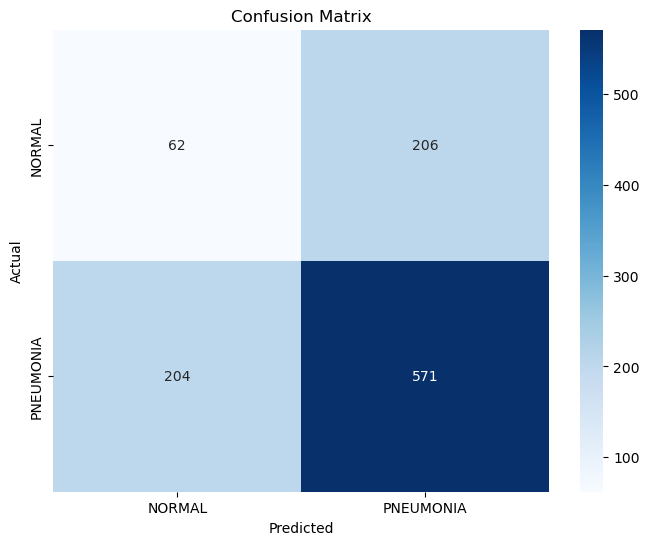

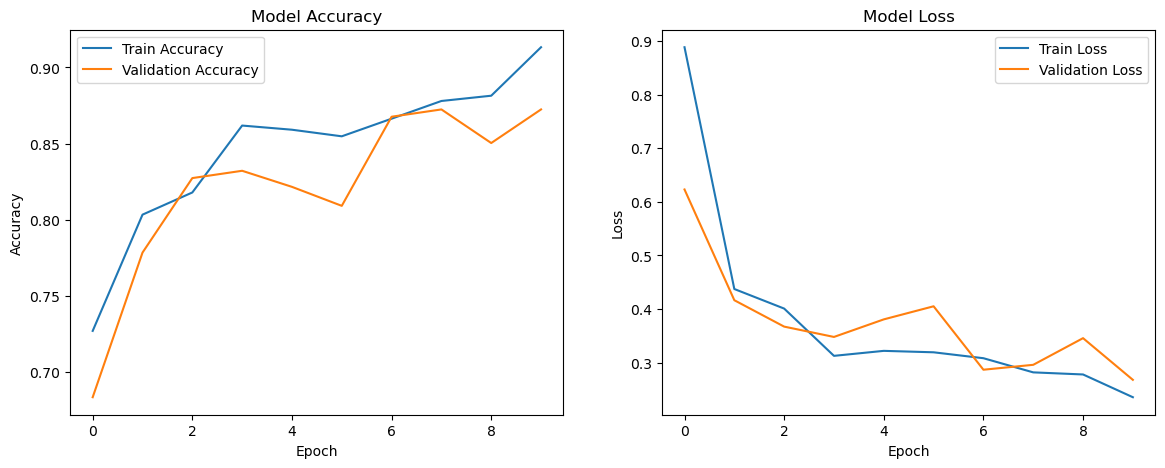

In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Predict the classes for the validation set
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.round(Y_pred).astype(int)

# Get true labels
y_true = validation_generator.classes

# Generate classification report
target_names = validation_generator.class_indices.keys()  # Get class names
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()
